### Activity 4 (Thursday)

- Show a plot of the total number of responses.
- Show a plot of the response by the sales channel.
- Show a plot of the response by the total claim amount.
- Show a plot of the response by income.
- (Optional) Don't limit your creativity!  plot any interesting findings/insights that describe some interesting facts about your data set and its variables.
- Plot the Correlation Heatmap.
- Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
DMCA_df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [99]:
DMCA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [100]:
DMCA_df.columns

Index(['region', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'month', 'employment_status',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [17]:
DMCA_df['response'].unique()

array(['no', 'yes'], dtype=object)

In [18]:
DMCA_df['response'].value_counts().sort_index()

no     9316
yes    1373
Name: response, dtype: int64

In [63]:
DMCA_df['response'].value_counts().sort_index()

no     9316
yes    1373
Name: response, dtype: int64

In [64]:
DMCA_df['response'].value_counts().index

Index(['no', 'yes'], dtype='object')

In [9]:
response_x = DMCA_df['response'].value_counts()

In [15]:
response_y = response_x.index

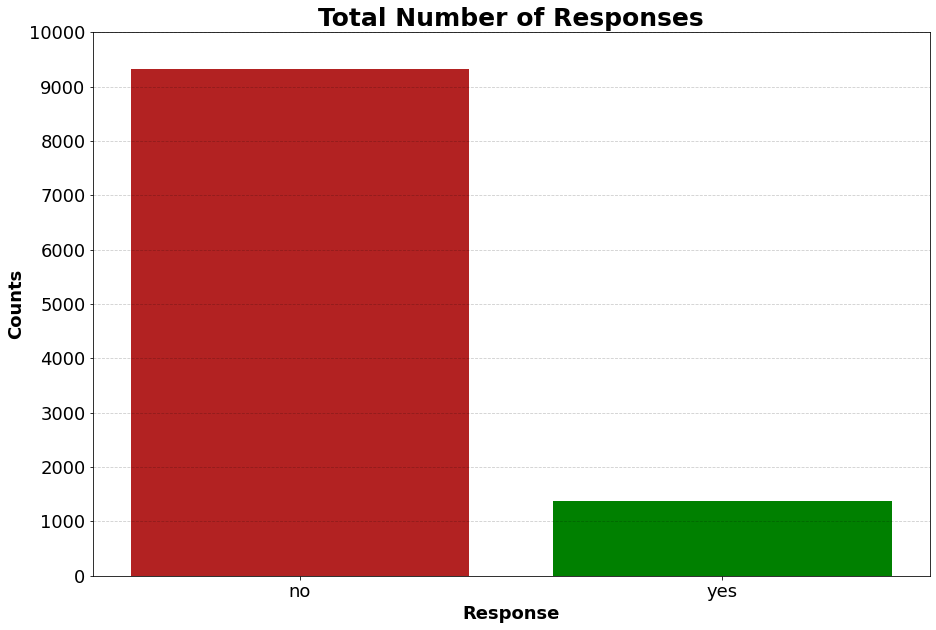

In [20]:
fig1, ax1 = plt.subplots(figsize = (15,10))

# calibrating line type, transparency, line color and axis of the bar

ax1.grid(ls="--", alpha=0.2, color="k", axis="y")

ax1.bar(response_y, response_x, color = ("firebrick", "green"))


# setting title and labels

plt.xlabel("Response",fontsize = 18, fontweight ='bold')
plt.ylabel("Counts", fontsize = 18, fontweight ='bold')

ax1.set_title("Total Number of Responses", fontsize = 25, fontweight ='bold')

# setting the ticks of the y axis (range of maximum by column in steps of 1000)

ax1.set_yticks(range(0,sum(DMCA_df["response"].value_counts()),1000))

# hide technical code output

plt.show()

<AxesSubplot:xlabel='response', ylabel='count'>

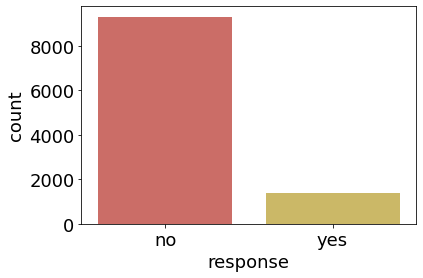

In [114]:
sns.countplot(x = "response", data = DMCA_df)

In [50]:
DMCA_df['sales_channel'].unique()

array(['agent', 'call center', 'branch', 'web'], dtype=object)

In [95]:
DMCA_df['sales_channel'].value_counts()

agent          4019
branch         2975
call center    2099
web            1596
Name: sales_channel, dtype: int64

In [108]:
DMCA_df['response'].unique()

array(['no', 'yes'], dtype=object)

In [109]:
DMCA_df['response'].value_counts()

no     9316
yes    1373
Name: response, dtype: int64

In [111]:
sales_channel_response = DMCA_df.groupby(['sales_channel', 'response'])['response'].count().rename('count').reset_index()


In [113]:
sales_channel_response

,sales_channel,response,count
0,agent,no,3340
1,agent,yes,679
2,branch,no,2665
3,branch,yes,310
4,call center,no,1890
5,call center,yes,209
6,web,no,1421
7,web,yes,175


/opt/anaconda3/envs/DA/lib/python3.9/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x4680 with 0 Axes>

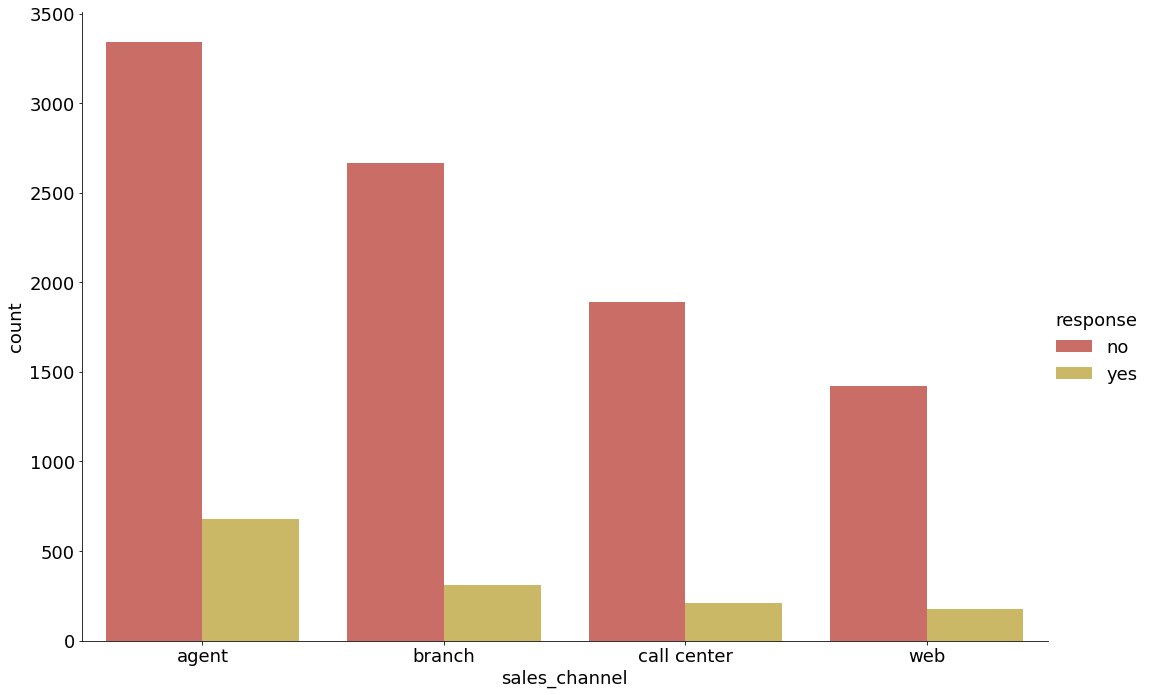

In [131]:
# sns.catplot for categorical data, 4 dimensional set: class, gender, alive, count

fig2 = plt.figure(figsize = (20, 65))
fig2 = sns.catplot(x = "sales_channel", y = "count", hue = "response", data = sales_channel_response, kind = "bar", palette = sns.color_palette("hls", 8), size = 10, aspect = 1.5)

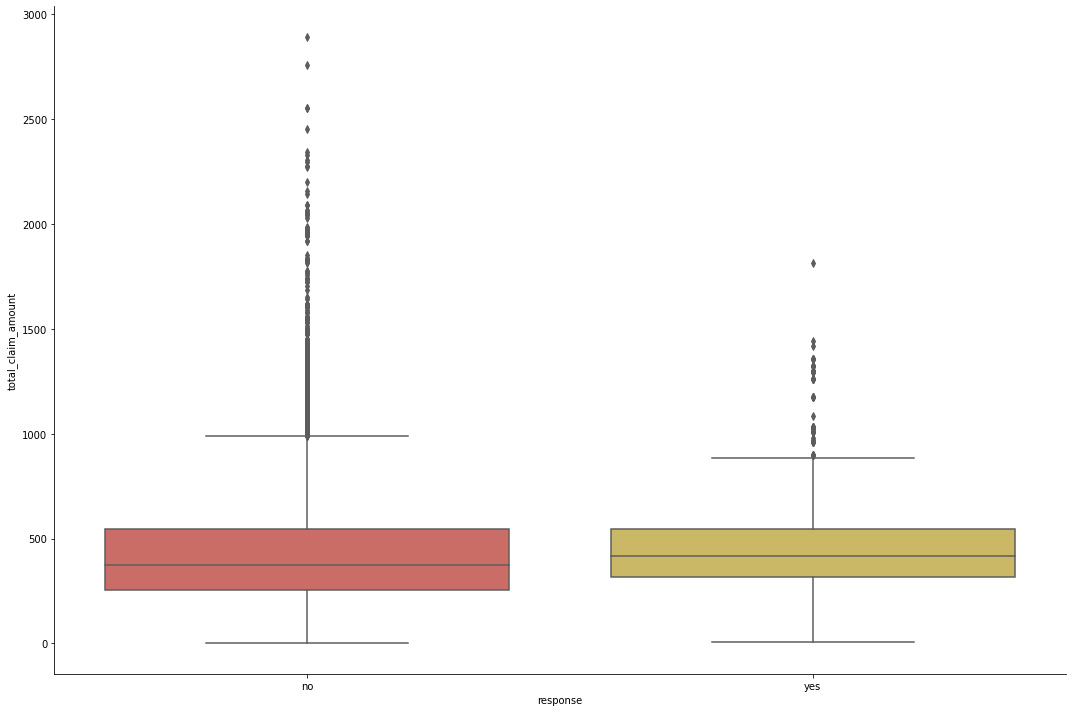

In [6]:
sns.catplot(x = "response", y = "total_claim_amount", data = DMCA_df, kind = "box", palette = sns.color_palette("hls", 8), height = 10, aspect = 1.5)


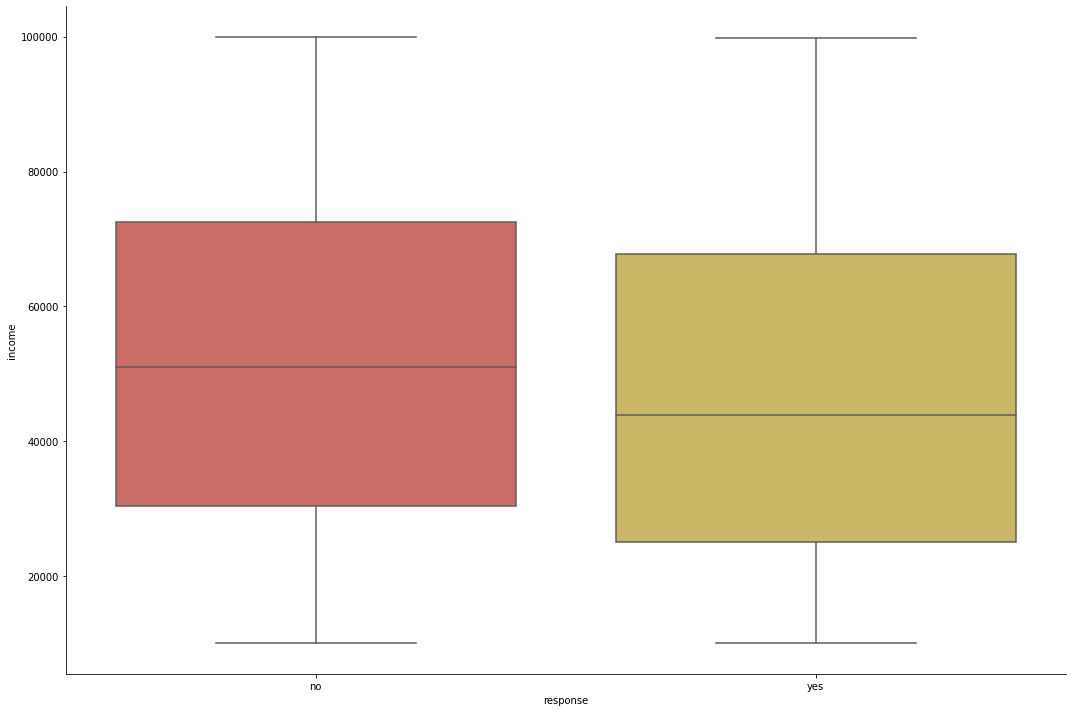

In [7]:
sns.catplot(x = "response", y = "income", data = DMCA_df, kind = "box", palette = sns.color_palette("hls", 8), height = 10, aspect = 1.5)

<AxesSubplot:>

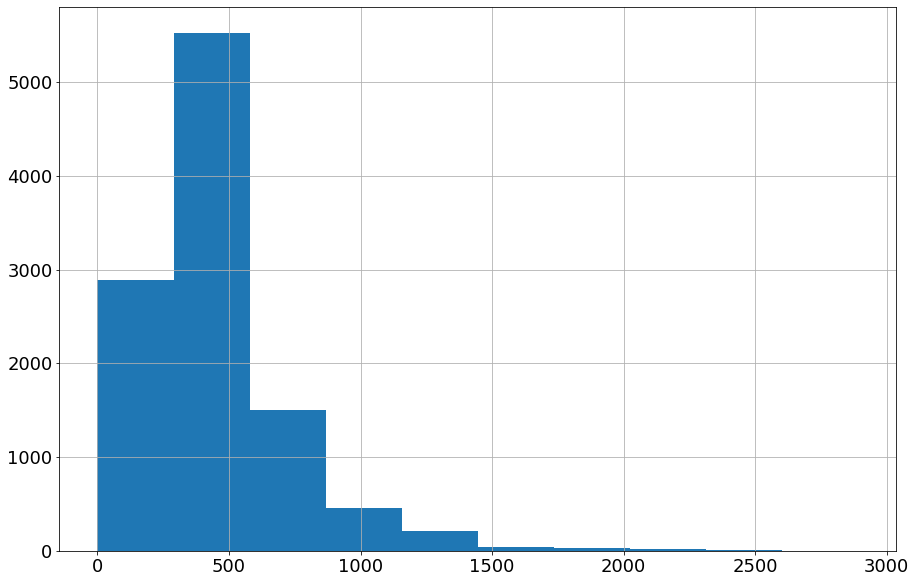

In [80]:
DMCA_df['total_claim_amount'].hist(figsize = (15, 10))

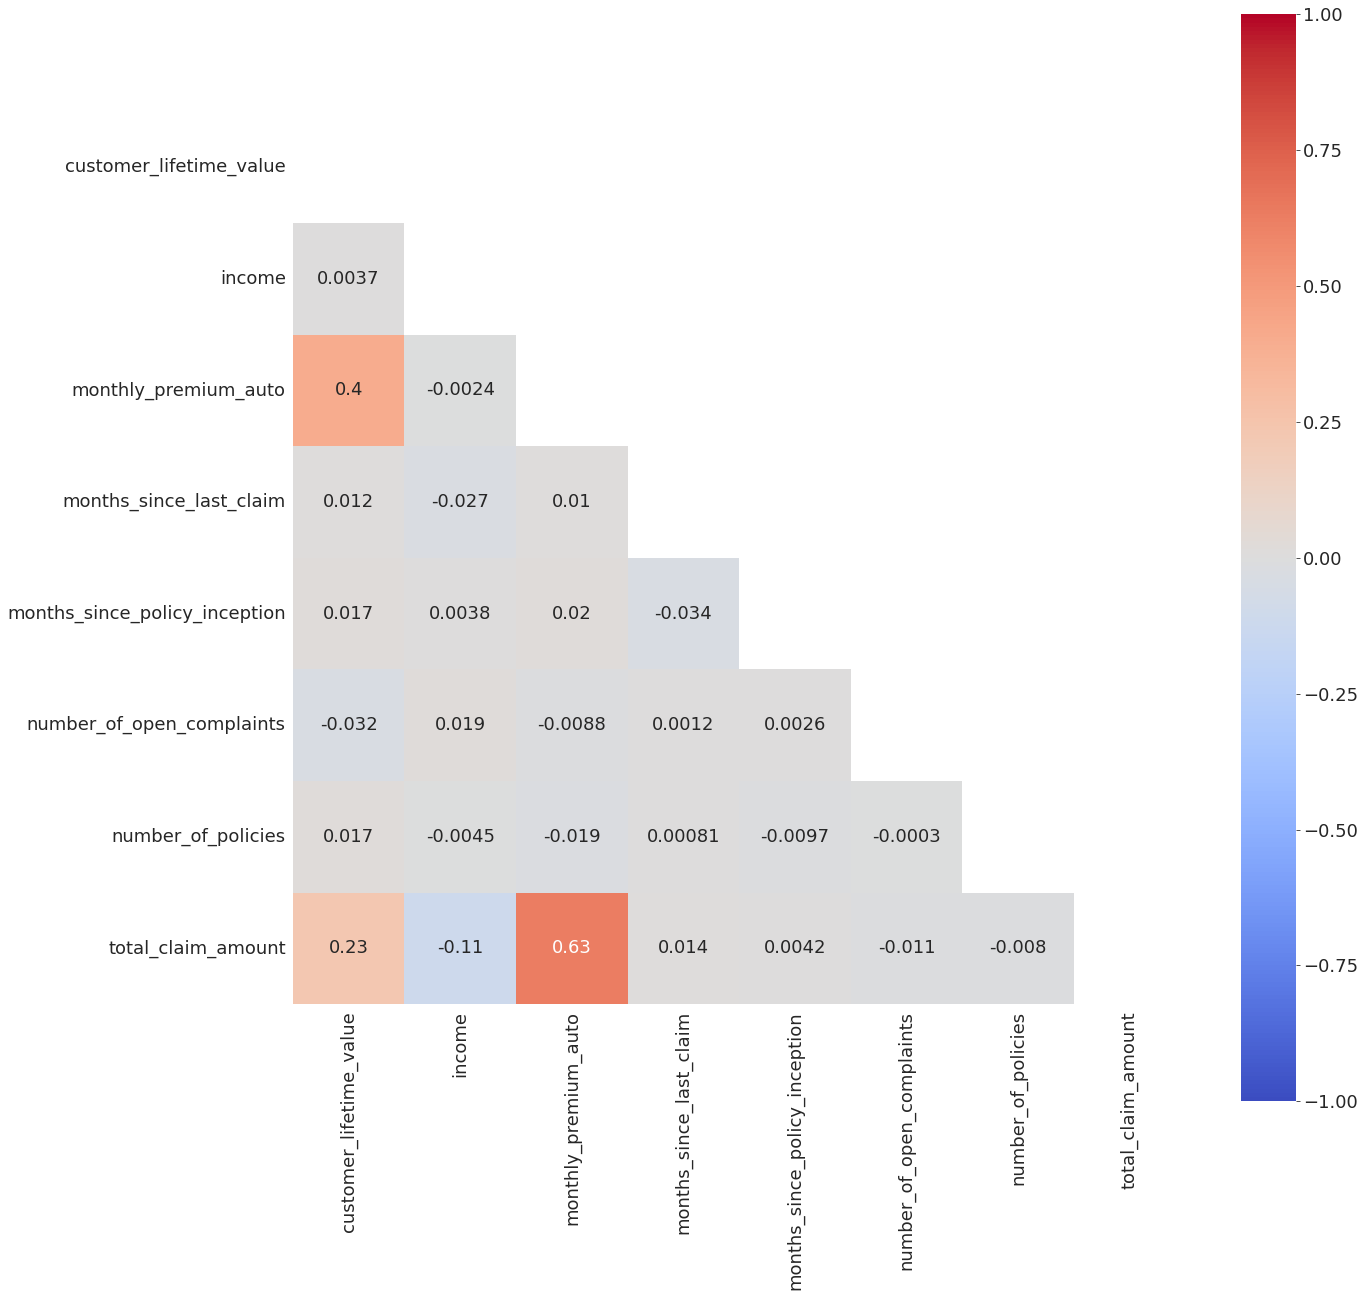

In [149]:
corr = DMCA_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)